In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Pyber_data_city_data.csv"
ride_data_to_load = "Pyber_data_ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv(city_data_to_load)
ridedata = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
citydata = citydata.drop_duplicates('city', keep = 'first')
cityride = pd.merge(citydata, ridedata)

# Display the data table for preview
cityride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

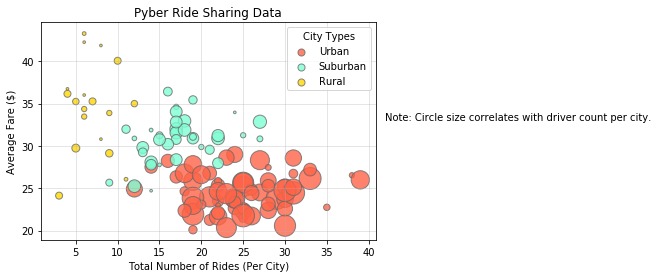

In [4]:
# Obtain the x and y coordinates for each of the three city types
citytype = cityride.groupby('city')

ridecount = citytype['ride_id'].count()
avgfair = citytype['fare'].mean()
typeofcity = citydata.set_index('city')['type']
drivercount = citytype['driver_count'].mean()

rideshare = pd.DataFrame({"Total Rides": ridecount, "Average Fare": avgfair, "Total Drivers": drivercount, "City Type": typeofcity})

# sep into types
rideurban = rideshare[rideshare['City Type'] == 'Urban']
ridesuburb = rideshare[rideshare['City Type'] == 'Suburban']
riderural = rideshare[rideshare['City Type'] == 'Rural']

#Plot scatter
plt.scatter(rideurban['Total Rides'], rideurban['Average Fare'], s = rideurban['Total Drivers']*7, edgecolor = 'dimgray', color="Tomato", label="Urban", alpha = .8)
plt.scatter(ridesuburb['Total Rides'], ridesuburb['Average Fare'], s = ridesuburb['Total Drivers']*7, edgecolor = 'dimgray', color="aquamarine", label="Suburban", alpha = .8)
plt.scatter(riderural['Total Rides'], riderural['Average Fare'], s = riderural['Total Drivers']*7, edgecolor = 'dimgray', color="gold", label="Rural", alpha = .8)

# Incorporate the other graph properties
#Labels
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(b=None, which='major', axis='both', alpha = .4)

#Legend
legend = plt.legend(loc="best", title="City Types")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.text(42, 33, "Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig('Pyber Ride Sharing Data.png')
plt.show()

## Total Fares by City Type

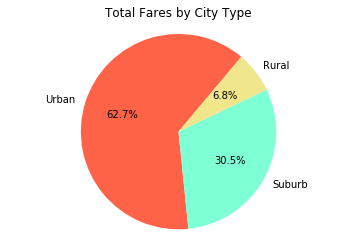

In [5]:
# Calculate Type Percents
citysplit = cityride.groupby('type')['fare']
percsums = citysplit.sum()

ruralsum = percsums['Rural']
suburbsum = percsums['Suburban']
urbansum = percsums['Urban']

# Build Pie Chart
types = ["Urban", "Suburb", "Rural"]
members = [urbansum, suburbsum, ruralsum]

colors = ["tomato", "aquamarine", "khaki"]
plt.title("Total Fares by City Type")
plt.pie(members, labels = types, autopct="%1.1f%%", colors=colors, startangle=50)
plt.axis("equal")

# Save Figure
plt.savefig('Total Fares by City Type.png')
plt.show()

## Total Rides by City Type

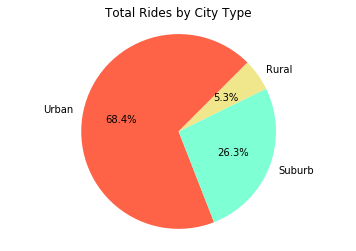

In [6]:
# Calculate Type Percents
percurban_ride = rideurban['Total Rides'].sum()
percsuburb_ride = ridesuburb['Total Rides'].sum()
percrural_ride = riderural['Total Rides'].sum()

types = ["Urban", "Suburb", "Rural"]
members = [percurban_ride, percsuburb_ride, percrural_ride]

# Build Pie Chart
colors = ["tomato", "aquamarine", "khaki"]
plt.title("Total Rides by City Type")
plt.pie(members, labels = types, autopct="%1.1f%%", colors=colors, startangle=45)
plt.axis("equal")

# Save Figure
plt.savefig('Total Rides by City Type.png')
plt.show()

## Total Drivers by City Type

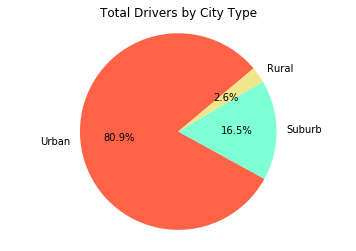

In [7]:
# Calculate Type Percents
percurban_drive = rideurban['Total Drivers'].sum()
percsuburb_drive = ridesuburb['Total Drivers'].sum()
percrural_drive = riderural['Total Drivers'].sum()

types = ["Urban", "Suburb", "Rural"]
members = [percurban_drive, percsuburb_drive, percrural_drive]

# Build Pie Chart
colors = ["tomato", "aquamarine", "khaki"]
plt.title("Total Drivers by City Type")
plt.pie(members, labels = types, autopct="%1.1f%%", colors=colors, startangle=40)
plt.axis("equal")

# Save Figure
plt.savefig('Total Drivers by City Type.png')
plt.show()